In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

data = pd.read_csv("C:/Users/91951/OneDrive/Desktop/Loan_Data.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [2]:
list(data)

['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [5]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
data.Credit_History= data.Credit_History.fillna(data.Credit_History.mode()[0])
data.Gender= data.Gender.fillna(data.Gender.mode()[0])
data.Dependents= data.Dependents.fillna(data.Dependents.mode()[0])
data.Self_Employed= data.Self_Employed.fillna(data.Self_Employed.mode()[0])
data.Married= data.Married.fillna(data.Married.mode()[0])

#Taking the mean data to fill the empty Loan Amount and Loan Amount Term
data.LoanAmount= data.LoanAmount.fillna(data.LoanAmount.mean())
data.Loan_Amount_Term= data.Loan_Amount_Term.fillna(data.Loan_Amount_Term.mean())

In [7]:
data.isnull().sum()


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:>

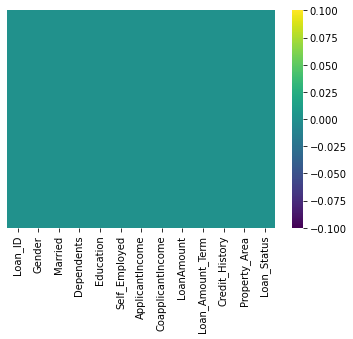

In [8]:
sns.heatmap(data.isnull(),  yticklabels=False, cmap="viridis")

Loan_Status       N    Y  All
Credit_History               
0.0              82    7   89
1.0             110  415  525
All             192  422  614


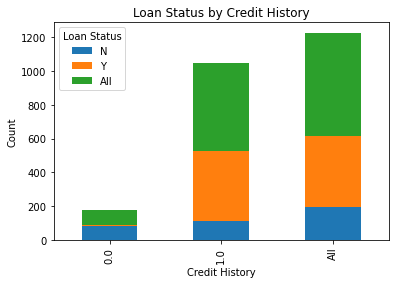

In [9]:
cross_tab=pd.crosstab(data['Credit_History'],data['Loan_Status'],margins=True)
print(cross_tab)
cross_tab.plot(kind='bar', stacked=True)
plt.xlabel('Credit History')
plt.ylabel('Count')
plt.title('Loan Status by Credit History')
plt.legend(title='Loan Status')
plt.show()

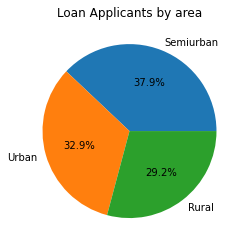

In [10]:
value_counts = data['Property_Area'].value_counts()

# Create a pie chart
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
plt.title('Loan Applicants by area')
plt.show()

<AxesSubplot:title={'center':'ApplicantIncome'}, xlabel='Education'>

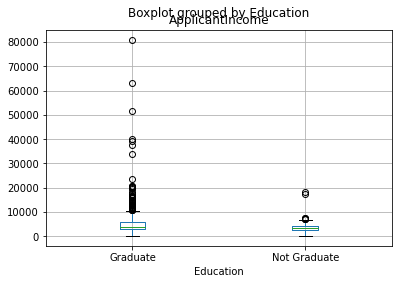

In [11]:
data.boxplot(column='ApplicantIncome',by='Education')

<AxesSubplot:xlabel='LoanAmount', ylabel='Count'>

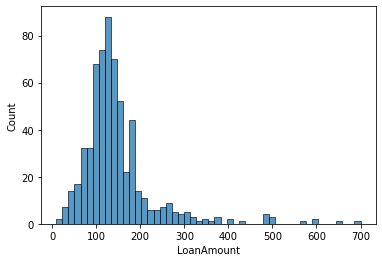

In [12]:
sns.histplot(data['LoanAmount'], bins=50)

In [13]:
data['TotalIncome']=data['ApplicantIncome']+data['CoapplicantIncome']

In [14]:
X=data.iloc[:,np.r_[1:5,9:11,13:14]].values
y=data.iloc[:,12].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
X_train.shape, y_train.shape

((491, 7), (491,))

In [15]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
for i in range(0,4):
  X_train[:,i]=labelencoder_X.fit_transform(X_train[:,i])
X_train[:,6]=labelencoder_X.fit_transform(X_train[:,6])

In [16]:
for i in range(0,5):
  X_test[:,i]=labelencoder_X.fit_transform(X_test[:,i])
X_test[:,6]=labelencoder_X.fit_transform(X_test[:,6])

In [17]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.fit_transform(X_test)

In [18]:
labelencoder_y=LabelEncoder()
y_train=labelencoder_y.fit_transform(y_train)

labelencoder_y=LabelEncoder()
y_test=labelencoder_y.fit_transform(y_test)

In [19]:
lgrclassifier= LogisticRegression(random_state=0)
lgrclassifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [20]:
model1 = lgrclassifier.predict(X_test)
classification_report(y_test, model1)

'              precision    recall  f1-score   support\n\n           0       0.88      0.42      0.57        33\n           1       0.82      0.98      0.89        90\n\n    accuracy                           0.83       123\n   macro avg       0.85      0.70      0.73       123\nweighted avg       0.84      0.83      0.81       123\n'

In [21]:
#Creating confusion matrix for classification
confusion_matrix(y_test,model1)*100

array([[1400, 1900],
       [ 200, 8800]], dtype=int64)

In [22]:
#Checking accuracy of the model
lr=accuracy_score(y_test, model1)*100
lr

82.92682926829268

In [23]:
from sklearn.tree import DecisionTreeClassifier
DTClassifier=DecisionTreeClassifier(random_state=0)
DTClassifier.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [24]:
model2 = DTClassifier.predict(X_test)
classification_report(y_test, model2)

'              precision    recall  f1-score   support\n\n           0       0.50      0.48      0.49        33\n           1       0.81      0.82      0.82        90\n\n    accuracy                           0.73       123\n   macro avg       0.66      0.65      0.65       123\nweighted avg       0.73      0.73      0.73       123\n'

In [25]:
confusion_matrix(y_test,model2)*100

array([[1600, 1700],
       [1600, 7400]], dtype=int64)

In [26]:
dtc=accuracy_score(y_test, model2)*100
dtc

73.17073170731707

In [27]:
from sklearn import svm
svmclassifier = svm.SVC(random_state=0)

# Train the SVM model
svmclassifier.fit(X_train, y_train)

SVC(random_state=0)

In [28]:
model3 = svmclassifier.predict(X_test)
classification_report(y_test, model3)

'              precision    recall  f1-score   support\n\n           0       0.88      0.42      0.57        33\n           1       0.82      0.98      0.89        90\n\n    accuracy                           0.83       123\n   macro avg       0.85      0.70      0.73       123\nweighted avg       0.84      0.83      0.81       123\n'

In [30]:
confusion_matrix(y_test,model3)*100

array([[1400, 1900],
       [ 200, 8800]], dtype=int64)

In [31]:
svm = accuracy_score(y_test, model3)*100
svm

82.92682926829268

In [32]:
from sklearn.ensemble import RandomForestClassifier
rfcclassifier = RandomForestClassifier(random_state=0)
rfcclassifier.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [33]:
model4 = rfcclassifier.predict(X_test)
classification_report(y_test, model3)

'              precision    recall  f1-score   support\n\n           0       0.88      0.42      0.57        33\n           1       0.82      0.98      0.89        90\n\n    accuracy                           0.83       123\n   macro avg       0.85      0.70      0.73       123\nweighted avg       0.84      0.83      0.81       123\n'

In [34]:
confusion_matrix(y_test,model4)*100


array([[1500, 1800],
       [1900, 7100]], dtype=int64)

In [35]:
rfc=accuracy_score(y_test, model4)*100
rfc

69.91869918699187

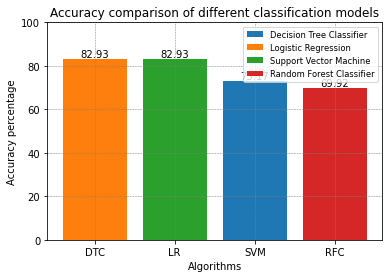

<Figure size 720x720 with 0 Axes>

In [36]:
a = [1, 2, 3, 4]
labels = ["DTC", "LR", "SVM", "RFC"]
values = [lr, svm, dtc, rfc]
accuracy_values = [round(val, 2) for val in values]
plt.ylim(top=100)
plt.bar(3, accuracy_values[2], label="Decision Tree Classifier")
plt.bar(1, accuracy_values[0], label="Logistic Regression")
plt.bar(2, accuracy_values[1], label="Support Vector Machine")
plt.bar(4, accuracy_values[3], label="Random Forest Classifier")
plt.grid(True, color='gray', linestyle='--', linewidth=0.5)
plt.xticks(a, labels)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy percentage")
plt.title("Accuracy comparison of different classification models")
plt.legend(loc='upper right', fontsize='small')

for i, v in enumerate(accuracy_values):
    plt.text(a[i], v, str(v), ha='center', va='bottom')

plt.figure(figsize=(10, 10))
plt.show()